# Fateme Fouladi

# LDA assignment

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [42]:
X=mnist.data
y=mnist.target

In [43]:
df=pd.concat([X, y], axis=1)

In [44]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [46]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


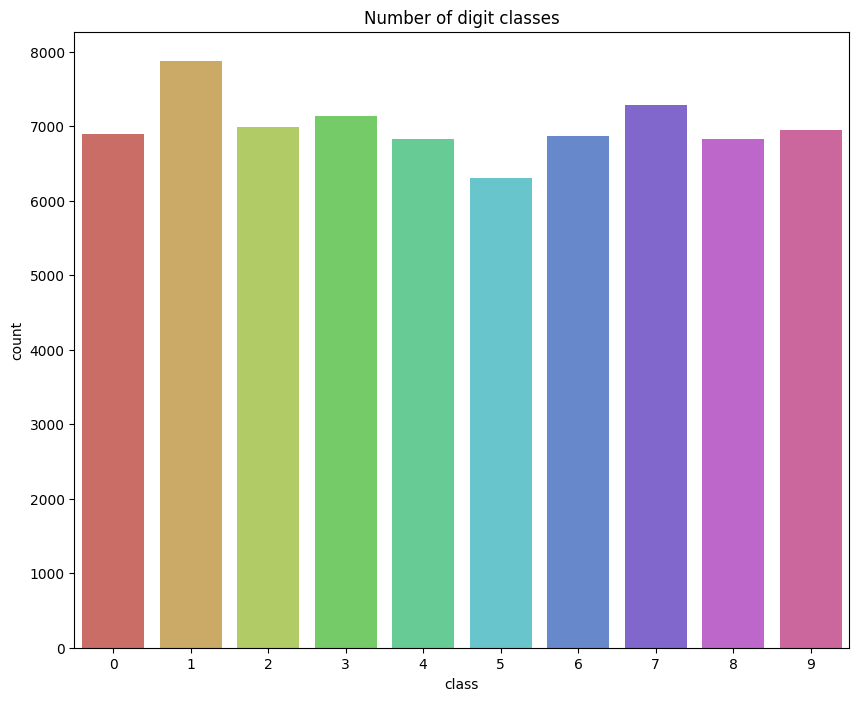

In [47]:
plt.figure(figsize=(10,8))
g=sns.countplot(df, x='class' ,palette='hls')
plt.title('Number of digit classes')
plt.show()

Text(0.5, 1.0, 'visualization of a sample of our data')

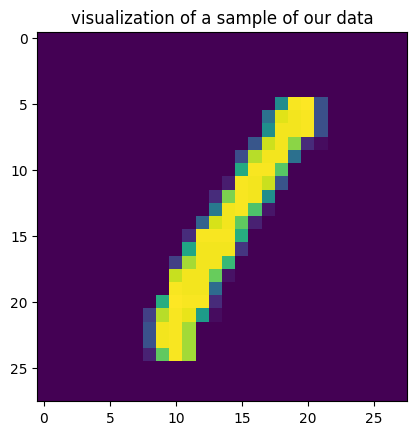

In [48]:
sample = X.iloc[3, :]
sample = sample.values.reshape(28,28)
plt.imshow(sample)
plt.title('visualization of a sample of our data')

# Q 1

In [49]:
from sklearn.model_selection import train_test_split
X=df.drop('class', axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (56000, 784)
X_test shape:  (14000, 784)


# Reducing dimension to 2,3, ...,9

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [52]:
# Create lists to strore accuracies and make dataframe later
final_train_acc=[]
final_val_acc=[]

# LDA with 2 components

In [53]:
# LDA2

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_2 = lda.fit_transform(X_train, y_train)
X_lda_2_df=pd.DataFrame(X_lda_2)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda2=[]
val_acc_lda2=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_2_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_2_df.iloc[train_index], X_lda_2_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda2.append(np.mean(train_accuracies))
    val_acc_lda2.append(np.mean(test_accuracies))


print('Train accuracies for for LDA2: ' ,train_acc_lda2)
print('Validation accuracies for for LDA2: ', val_acc_lda2)

print('mean Train accuracies for for LDA2: ' ,np.mean(train_acc_lda2))
print('mean Validation accuracies for for LDA2: ', np.mean(val_acc_lda2))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda2)
final_val_acc.append(val_acc_lda2)


Train accuracies for for LDA2:  [0.3397991071428571, 0.3036696428571429, 0.32303124999999994, 0.27844196428571427, 0.3386517857142858, 0.3204464285714286, 0.35008482142857145, 0.3307053571428572, 0.35500446428571425, 0.3034151785714286]
Validation accuracies for for LDA2:  [0.3409642857142857, 0.3045714285714286, 0.32342857142857145, 0.27664285714285713, 0.33723214285714287, 0.32085714285714284, 0.348875, 0.3308928571428572, 0.35098214285714285, 0.30142857142857143]
mean Train accuracies for for LDA2:  0.32432500000000003
mean Validation accuracies for for LDA2:  0.32358750000000003


# LDA with 3 components

In [54]:
# LDA3

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda_3 = lda.fit_transform(X_train, y_train)
X_lda_3_df=pd.DataFrame(X_lda_3)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda3=[]
val_acc_lda3=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_3_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_3_df.iloc[train_index], X_lda_3_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda3.append(np.mean(train_accuracies))
    val_acc_lda3.append(np.mean(test_accuracies))


print('Train accuracies for for LDA3: ' ,train_acc_lda3)
print('Validation accuracies for for LDA3: ', val_acc_lda3)

print('mean Train accuracies for for LDA3: ' ,np.mean(train_acc_lda3))
print('mean Validation accuracies for for LDA3: ', np.mean(val_acc_lda3))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda3)
final_val_acc.append(val_acc_lda3)

Train accuracies for for LDA3:  [0.5660892857142857, 0.46108035714285717, 0.48775, 0.4817321428571429, 0.4581875, 0.551125, 0.48634374999999996, 0.4789598214285714, 0.4299598214285714, 0.4869955357142858]
Validation accuracies for for LDA3:  [0.5688214285714286, 0.46278571428571424, 0.4896607142857142, 0.48433928571428575, 0.4608035714285714, 0.5530535714285714, 0.4853035714285715, 0.47633928571428574, 0.4302142857142857, 0.4865178571428571]
mean Train accuracies for for LDA3:  0.48882232142857146
mean Validation accuracies for for LDA3:  0.48978392857142855


# LDA with 4 components

In [55]:
# LDA4

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=4)
X_lda_4 = lda.fit_transform(X_train, y_train)
X_lda_4_df=pd.DataFrame(X_lda_4)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda4=[]
val_acc_lda4=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_4_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_4_df.iloc[train_index], X_lda_4_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda4.append(np.mean(train_accuracies))
    val_acc_lda4.append(np.mean(test_accuracies))


print('Train accuracies for for LDA4: ' ,train_acc_lda4)
print('Validation accuracies for for LDA4: ', val_acc_lda4)

print('mean Train accuracies for for LDA4: ' ,np.mean(train_acc_lda4))
print('mean Validation accuracies for for LDA4: ', np.mean(val_acc_lda4))

#---------------------------------------------------------------

final_train_acc.append(train_acc_lda4)
final_val_acc.append(val_acc_lda4)

Train accuracies for for LDA4:  [0.6343348214285714, 0.5960982142857143, 0.6019642857142857, 0.6065580357142857, 0.6497678571428571, 0.6532544642857143, 0.6327499999999999, 0.6439955357142857, 0.6456741071428571, 0.6156205357142858]
Validation accuracies for for LDA4:  [0.634107142857143, 0.5965714285714286, 0.60325, 0.6046607142857143, 0.6506964285714286, 0.6516071428571429, 0.6315535714285715, 0.6434464285714286, 0.645, 0.6172678571428571]
mean Train accuracies for for LDA4:  0.6280017857142857
mean Validation accuracies for for LDA4:  0.6278160714285714


# LDA with 5 components

In [56]:
# LDA5

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=5)
X_lda_5 = lda.fit_transform(X_train, y_train)
X_lda_5_df=pd.DataFrame(X_lda_5)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda5=[]
val_acc_lda5=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_5_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_5_df.iloc[train_index], X_lda_5_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda5.append(np.mean(train_accuracies))
    val_acc_lda5.append(np.mean(test_accuracies))


print('Train accuracies for for LDA5: ' ,train_acc_lda5)
print('Validation accuracies for for LDA5: ', val_acc_lda5)

print('mean Train accuracies for for LDA5: ' ,np.mean(train_acc_lda5))
print('mean Validation accuracies for for LDA5: ', np.mean(val_acc_lda5))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda5)
final_val_acc.append(val_acc_lda5)

Train accuracies for for LDA5:  [0.7029955357142857, 0.6675803571428572, 0.6625491071428572, 0.6829508928571429, 0.66328125, 0.6889598214285714, 0.6745089285714286, 0.6949910714285715, 0.6608705357142858, 0.6857232142857143]
Validation accuracies for for LDA5:  [0.7040892857142856, 0.6657678571428571, 0.659142857142857, 0.6821607142857143, 0.6639285714285714, 0.6883750000000001, 0.6753928571428572, 0.6923214285714285, 0.6577857142857143, 0.6875714285714285]
mean Train accuracies for for LDA5:  0.6784410714285714
mean Validation accuracies for for LDA5:  0.6776535714285714


# LDA with 6 components

In [57]:
# LDA6

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=6)
X_lda_6 = lda.fit_transform(X_train, y_train)
X_lda_6_df=pd.DataFrame(X_lda_6)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda6=[]
val_acc_lda6=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_6_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_6_df.iloc[train_index], X_lda_6_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda6.append(np.mean(train_accuracies))
    val_acc_lda6.append(np.mean(test_accuracies))


print('Train accuracies for for LDA6: ' ,train_acc_lda6)
print('Validation accuracies for for LDA6: ', val_acc_lda6)

print('mean Train accuracies for for LDA6: ' ,np.mean(train_acc_lda6))
print('mean Validation accuracies for for LDA6: ', np.mean(val_acc_lda6))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda6)
final_val_acc.append(val_acc_lda6)

Train accuracies for for LDA6:  [0.7174196428571429, 0.7116071428571429, 0.7011473214285714, 0.7431026785714286, 0.7190089285714285, 0.72009375, 0.7500848214285715, 0.7357678571428572, 0.7029866071428572, 0.7062098214285715]
Validation accuracies for for LDA6:  [0.7188571428571429, 0.7109285714285714, 0.7010892857142856, 0.7437678571428571, 0.7181071428571428, 0.7207857142857143, 0.7479464285714286, 0.7353035714285715, 0.7018214285714285, 0.7047321428571428]
mean Train accuracies for for LDA6:  0.7207428571428572
mean Validation accuracies for for LDA6:  0.7203339285714285


# LDA with 7 components

In [58]:
# LDA7

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=7)
X_lda_7 = lda.fit_transform(X_train, y_train)
X_lda_7_df=pd.DataFrame(X_lda_7)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda7=[]
val_acc_lda7=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_7_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_7_df.iloc[train_index], X_lda_7_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda7.append(np.mean(train_accuracies))
    val_acc_lda7.append(np.mean(test_accuracies))


print('Train accuracies for for LDA7: ' ,train_acc_lda7)
print('Validation accuracies for for LDA7: ', val_acc_lda7)

print('mean Train accuracies for for LDA7: ' ,np.mean(train_acc_lda7))
print('mean Validation accuracies for for LDA7: ', np.mean(val_acc_lda7))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda7)
final_val_acc.append(val_acc_lda7)

Train accuracies for for LDA7:  [0.7710491071428571, 0.758875, 0.7864375000000001, 0.7477723214285714, 0.7418883928571429, 0.760875, 0.7622053571428571, 0.7592723214285714, 0.7568214285714285, 0.7815714285714286]
Validation accuracies for for LDA7:  [0.7700714285714285, 0.7585178571428572, 0.7850892857142857, 0.7475714285714286, 0.741625, 0.7618571428571429, 0.7620357142857144, 0.7585, 0.7573035714285714, 0.7817321428571429]
mean Train accuracies for for LDA7:  0.7626767857142858
mean Validation accuracies for for LDA7:  0.7624303571428572


# LDA with 8 components

In [59]:
# LDA8

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=8)
X_lda_8 = lda.fit_transform(X_train, y_train)
X_lda_8_df=pd.DataFrame(X_lda_8)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda8=[]
val_acc_lda8=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_8_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_8_df.iloc[train_index], X_lda_8_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda8.append(np.mean(train_accuracies))
    val_acc_lda8.append(np.mean(test_accuracies))


print('Train accuracies for for LDA8: ' ,train_acc_lda8)
print('Validation accuracies for for LDA8: ', val_acc_lda8)

print('mean Train accuracies for for LDA8: ' ,np.mean(train_acc_lda8))
print('mean Validation accuracies for for LDA8: ', np.mean(val_acc_lda8))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda8)
final_val_acc.append(val_acc_lda8)

Train accuracies for for LDA8:  [0.818375, 0.8249017857142856, 0.8211875, 0.8316250000000001, 0.8243392857142858, 0.8254151785714285, 0.8138482142857143, 0.8183392857142857, 0.8309017857142857, 0.8227008928571429]
Validation accuracies for for LDA8:  [0.8194464285714286, 0.8256428571428571, 0.8220357142857143, 0.8311607142857141, 0.8241964285714285, 0.8250357142857144, 0.8119285714285714, 0.8177499999999999, 0.8305357142857144, 0.8228928571428572]
mean Train accuracies for for LDA8:  0.8231633928571428
mean Validation accuracies for for LDA8:  0.8230625


# LDA with 9 components

In [60]:
# LDA9

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda_9 = lda.fit_transform(X_train, y_train)
X_lda_9_df=pd.DataFrame(X_lda_9)


# Perceptron classifier
clf_perc = Perceptron()


# 5-fold crossvalidation
kfold_cv=KFold(n_splits=5, shuffle=True)

# Lists to store train and test accuracies for every 5-Fold
train_acc_lda9=[]
val_acc_lda9=[]

for i in range(10):
    # Lists to store train and test accuracies for each fold
    train_accuracies = []
    test_accuracies = []

    # Perform K-fold cross-validation
    for train_index, test_index in kfold_cv.split(X_lda_9_df, y_train):

        # Split data into train and test sets for each fold
        X_train_fold, X_test_fold = X_lda_9_df.iloc[train_index], X_lda_9_df.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train perceptrin model on training data
        clf_perc.fit(X_train_fold, y_train_fold)

        # Predictions on train and test data
        y_train_pred = clf_perc.predict(X_train_fold)
        y_test_pred = clf_perc.predict(X_test_fold)

        # Accuracy for this fold and append to lists
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Strore mean of accuracies for each 5-fold
    train_acc_lda9.append(np.mean(train_accuracies))
    val_acc_lda9.append(np.mean(test_accuracies))


print('Train accuracies for for LDA9: ' ,train_acc_lda9)
print('Validation accuracies for for LDA9: ', val_acc_lda9)

print('mean Train accuracies for for LDA9: ' ,np.mean(train_acc_lda9))
print('mean Validation accuracies for for LDA9: ', np.mean(val_acc_lda9))
#---------------------------------------------------------------

final_train_acc.append(train_acc_lda9)
final_val_acc.append(val_acc_lda9)

Train accuracies for for LDA9:  [0.8397008928571429, 0.8370401785714285, 0.8399955357142858, 0.8336741071428572, 0.8356830357142858, 0.8455267857142857, 0.8314910714285715, 0.83434375, 0.843299107142857, 0.8372723214285713]
Validation accuracies for for LDA9:  [0.8406607142857144, 0.8368749999999998, 0.8407678571428571, 0.8324107142857142, 0.8344642857142857, 0.8442857142857143, 0.8308035714285713, 0.834875, 0.8446071428571429, 0.8349464285714285]
mean Train accuracies for for LDA9:  0.8378026785714286
mean Validation accuracies for for LDA9:  0.8374696428571429


In [61]:
indecies=['2_components','3_components','4_components','5_components','6_components','7_components','8_components','9_components']
columns=[f'iter{i}' for i in range(1,11)]
train_acc_df=(pd.DataFrame(final_train_acc,columns=columns, index=indecies))
train_acc_df=train_acc_df.T
test_acc_df=(pd.DataFrame(final_val_acc,columns=columns, index=indecies))
test_acc_df=test_acc_df.T

In [62]:
print('Train accuracies over 10 iteration')
print(train_acc_df)

Train accuracies over 10 iteration
        2_components  3_components  4_components  5_components  6_components  \
iter1       0.339799      0.566089      0.634335      0.702996      0.717420   
iter2       0.303670      0.461080      0.596098      0.667580      0.711607   
iter3       0.323031      0.487750      0.601964      0.662549      0.701147   
iter4       0.278442      0.481732      0.606558      0.682951      0.743103   
iter5       0.338652      0.458188      0.649768      0.663281      0.719009   
iter6       0.320446      0.551125      0.653254      0.688960      0.720094   
iter7       0.350085      0.486344      0.632750      0.674509      0.750085   
iter8       0.330705      0.478960      0.643996      0.694991      0.735768   
iter9       0.355004      0.429960      0.645674      0.660871      0.702987   
iter10      0.303415      0.486996      0.615621      0.685723      0.706210   

        7_components  8_components  9_components  
iter1       0.771049      0.81837

In [63]:
print('Validation accuracies over 10 iteration')
print(test_acc_df)

Validation accuracies over 10 iteration
        2_components  3_components  4_components  5_components  6_components  \
iter1       0.340964      0.568821      0.634107      0.704089      0.718857   
iter2       0.304571      0.462786      0.596571      0.665768      0.710929   
iter3       0.323429      0.489661      0.603250      0.659143      0.701089   
iter4       0.276643      0.484339      0.604661      0.682161      0.743768   
iter5       0.337232      0.460804      0.650696      0.663929      0.718107   
iter6       0.320857      0.553054      0.651607      0.688375      0.720786   
iter7       0.348875      0.485304      0.631554      0.675393      0.747946   
iter8       0.330893      0.476339      0.643446      0.692321      0.735304   
iter9       0.350982      0.430214      0.645000      0.657786      0.701821   
iter10      0.301429      0.486518      0.617268      0.687571      0.704732   

        7_components  8_components  9_components  
iter1       0.770071      0.

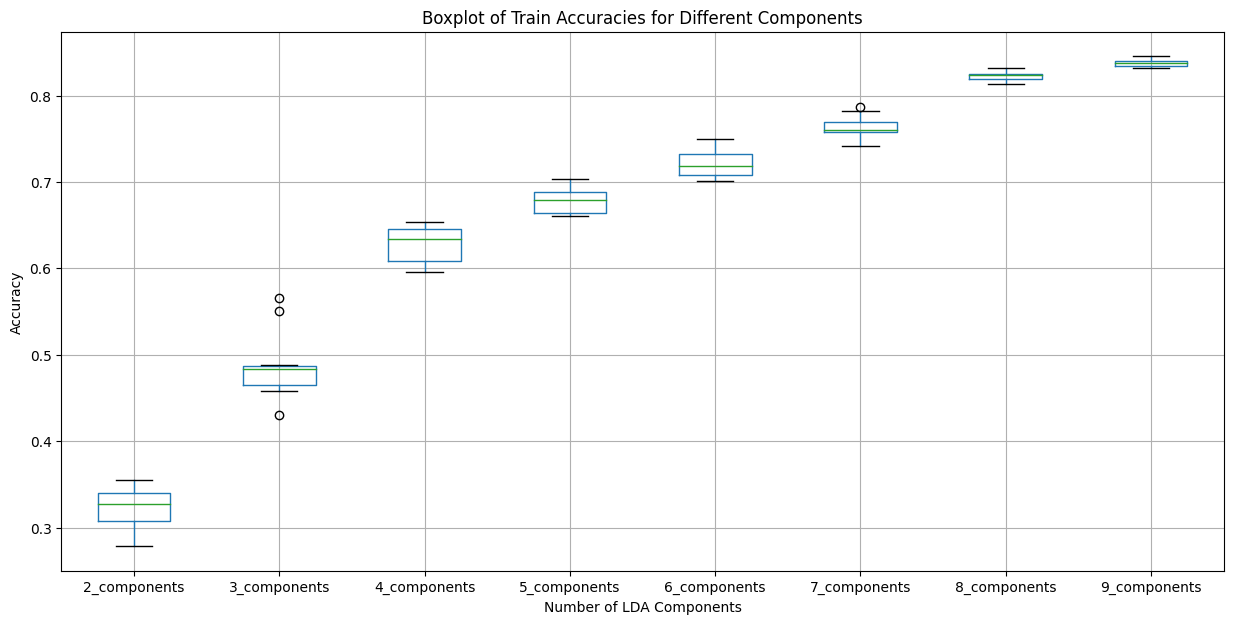

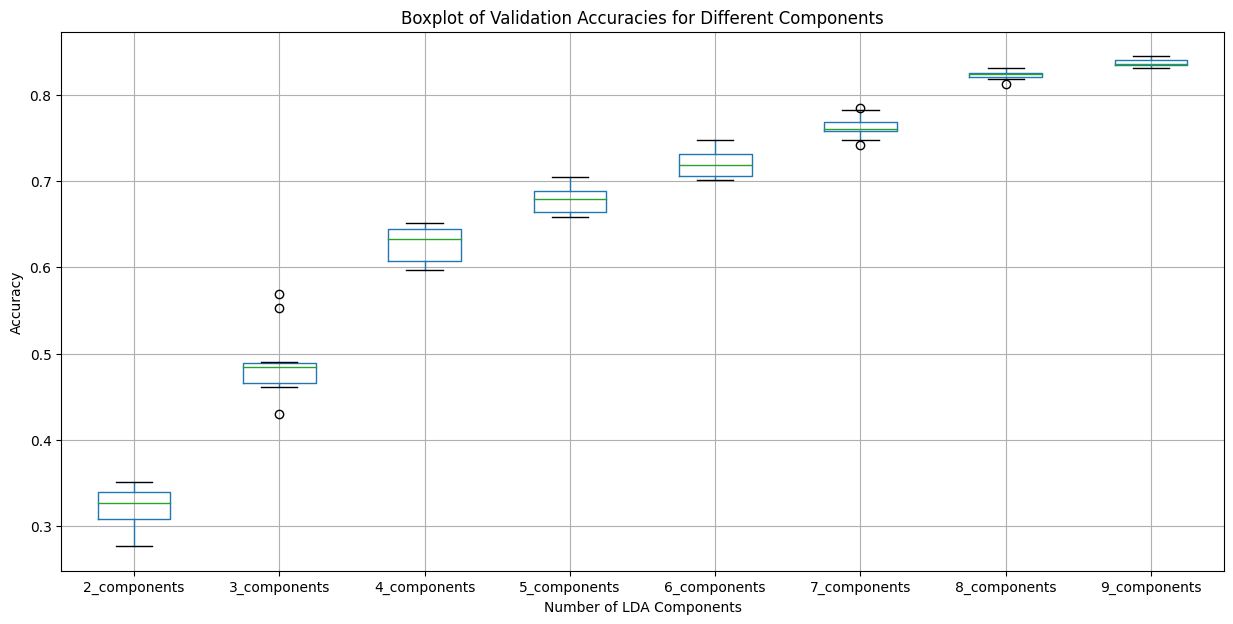

In [65]:
# Plotting boxplots

# train plots
plt.figure(figsize=(15, 7))
train_acc_df.boxplot()
plt.title('Boxplot of Train Accuracies for Different Components')
plt.xlabel('Number of LDA Components')
plt.ylabel('Accuracy')
plt.show()

# validation plots
plt.figure(figsize=(15, 7))
test_acc_df.boxplot()
plt.title('Boxplot of Validation Accuracies for Different Components')
plt.xlabel('Number of LDA Components')
plt.ylabel('Accuracy')
plt.show()

# Q2

we choose LDA model with 9 components, and now we want to use normalization method and choose best parameters for perceptron classifier.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda_9 = lda.fit_transform(X_train, y_train)
X_lda_9_df = pd.DataFrame(X_lda_9)

# Perceptron classifier
clf_perc = Perceptron()

# StandardScaler for normalization
scaler = StandardScaler()

# Create a pipeline with LDA, StandardScaler, and Perceptron
pipeline = make_pipeline(scaler, clf_perc)

# 5-fold cross-validation
kfold_cv = KFold(n_splits=5, shuffle=True)

# Define the parameter grid for grid search
param_grid = {
    'perceptron__penalty': [None, 'l2', 'l1'],
    'perceptron__alpha': [0.0001 , 0.01, 0.1]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold_cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_lda_9_df, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model using 5-fold cross-validation
cross_val_results = cross_val_score(grid_search.best_estimator_, X_lda_9_df, y_train, cv=kfold_cv, scoring='accuracy')

# Print results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))


Best Hyperparameters: {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l2'}
Cross-Validation Results: [0.78892857 0.80473214 0.85232143 0.80973214 0.82580357]
Mean Accuracy: 0.8163035714285714


Scaling the data and adjusting the perceptron's hyperparameters didn't enhance our model's performance.

So we use "Forward Selection" method for feature selection

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda_9 = lda.fit_transform(X_train, y_train)
X_lda_9_df = pd.DataFrame(X_lda_9)

# Perceptron classifier
clf_perc = Perceptron()

# 5-fold cross-validation
kfold_cv = KFold(n_splits=5, shuffle=True)

# Using "Forward Selection" method for feature selection
selector = SFS(clf_perc, n_features_to_select=5, direction='forward')
selected_features = selector.fit(X_lda_9_df, y_train)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X_lda_9_df.columns[selected_feature_indices]
# Print selected features
print('selected features: ',selected_features)

# Evaluate the model using 5-fold cross-validation
cross_val_results = cross_val_score(clf_perc, X_lda_9_df[selected_features], y_train, cv=kfold_cv, scoring='accuracy')

# Print results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))

selected features:  Int64Index([0, 1, 2, 3, 7], dtype='int64')
Cross-Validation Results: [0.65357143 0.67464286 0.7725     0.67714286 0.70633929]
Mean Accuracy: 0.6968392857142857


Feature selection led to a decrease in our model's accuracy, indicating that it may not be a suitable method in this context.

Then we change our classifier model to SVM:

In [68]:
from sklearn.svm import SVC

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda_9 = lda.fit_transform(X_train, y_train)
X_lda_9_df = pd.DataFrame(X_lda_9)

# SVM classifier
clf_svm = SVC()

# 5-fold cross-validation
kfold_cv = KFold(n_splits=5, shuffle=True)

# Evaluate the model using 5-fold cross-validation
cross_val_results = cross_val_score(clf_svm, X_lda_9_df, y_train, cv=kfold_cv, scoring='accuracy')

# Print results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))

Cross-Validation Results: [0.9225     0.91901786 0.91866071 0.92410714 0.91964286]
Mean Accuracy: 0.9207857142857142


SVM works better.

Now we use Gridsearch to choose best kernel for svm classifier:

In [69]:

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda_9 = lda.fit_transform(X_train, y_train)
X_lda_9_df = pd.DataFrame(X_lda_9)

# SVM classifier
clf_svm = SVC()

# 5-fold cross-validation
kfold_cv = KFold(n_splits=5, shuffle=True)

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV
grid_search = GridSearchCV(clf_svm, param_grid, cv=kfold_cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_lda_9_df, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model using 5-fold cross-validation with the best hyperparameters
cross_val_results = cross_val_score(grid_search.best_estimator_, X_lda_9_df, y_train, cv=kfold_cv, scoring='accuracy')

# Print results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))


Best Hyperparameters: {'kernel': 'rbf'}
Cross-Validation Results: [0.91991071 0.92178571 0.92133929 0.921875   0.91955357]
Mean Accuracy: 0.9208928571428572


# Q3

We use our best model for test dataset

In [72]:
# LDA9

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda_9 = lda.fit_transform(X_train, y_train)
X_lda_9_df=pd.DataFrame(X_lda_9)
X_test_lda=lda.transform(X_test)
X_test_lda_df=pd.DataFrame(X_test_lda)

# Perceptron classifier
clf_svm = SVC(kernel='rbf')

# Fit svm classifier
clf_svm.fit(X_lda_9_df, y_train)

# Predict test dataset
y_pred=clf_svm.predict(X_test_lda_df)

# Evaluate model
test_acc=accuracy_score(y_pred, y_test)

print('The final model accuracy on Test set: ', test_acc)

The final model accuracy on Test set:  0.916


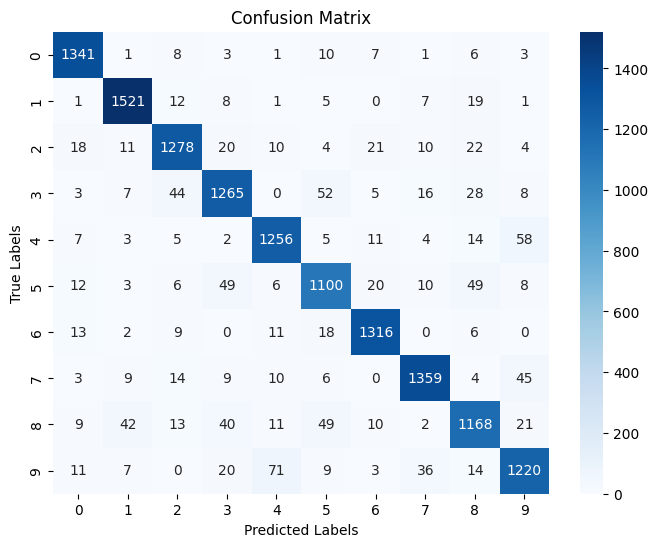

In [73]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()